In [20]:
import numpy as np
import pandas as pd

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [23]:
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [24]:
mcdonalds.shape

(1453, 15)

In [25]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [36]:
# Selecting the first 11 columns of mcdonalds DataFrame
MD_x = mcdonalds.iloc[:, 0:11].values
# Converting "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculating column means
col_means = np.round(np.mean(MD_x, axis=0), 2)

# Get column names
column_names = mcdonalds.columns[:11].tolist()

# Printing column names and their corresponding means
for i in range(len(column_names)):
    print(f"{column_names[i]}: {col_means[i]}")

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


# PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [46]:
explained_variance = np.var(MD_pca, axis=0)
print("Explained variance:")
print(explained_variance)

Explained variance:
[0.57272954 0.3687483  0.25446554 0.15893086 0.11376379 0.09620408
 0.08386678 0.07564    0.07030972 0.06187963 0.05608433]


In [44]:
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [45]:
cumulative_proportion = np.cumsum(explained_variance_ratio)
print("Cumulstive_proportion:")
print(cumulative_proportion)

Cumulstive_proportion:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [47]:
# Summary
summary = pd.DataFrame({
    'Standard deviation': np.sqrt(explained_variance),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_proportion
})
print(summary)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.756789                0.299447               0.299447
1             0.607246                0.192797               0.492244
2             0.504446                0.133045               0.625290
3             0.398661                0.083096               0.708386
4             0.337289                0.059481               0.767866
5             0.310168                0.050300               0.818166
6             0.289598                0.043849               0.862015
7             0.275027                0.039548               0.901563
8             0.265160                0.036761               0.938323
9             0.248756                0.032353               0.970677
10            0.236821                0.029323               1.000000


In [48]:
# now for each principal component i.e from 0 to 11
print("Principal Components:")
names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
print(pd.DataFrame(data= MD_pca, columns=names))

Principal Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1    -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2     0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3    -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4     0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   
1449 -0.957339  0.014308  0.303843  0.444350 -0.133690  0.381804 -0.326432   
1450 -0.185894  1.062662  0.220857 -0.467643 -0.187757 -0.192703 -0.091597   
1451 -1.182064 -0.038570  0.561561  0.701126  0.047645  0.193687 -0.027335   
1452  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   

           PC8       PC9      PC10      P

In [50]:
df_eleven = column_names
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

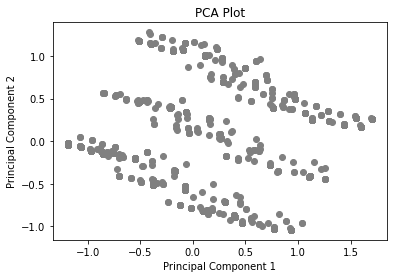

In [53]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

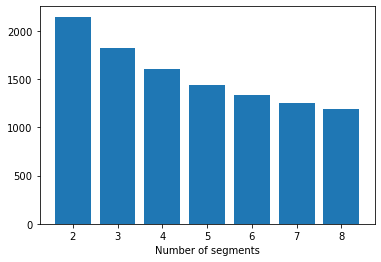

In [61]:
# Perform K-means clustering
from sklearn.cluster import KMeans
k_values = range(2, 9)
results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    results.append(kmeans)

# Plot number of segments vs. within-cluster sum of squares
plt.bar(k_values, [res.inertia_ for res in results])
plt.xlabel("Number of segments")
plt.show()

In [63]:
# Fit Gaussian mixture models for different number of components (2 to 8)
from sklearn.mixture import GaussianMixture
k_values = range(2, 9)
models = []
for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    models.append(model)

# Print the fitted mixture models
for i, model in enumerate(models):
    print(f"Model {i+2}:")
    print(model)

Model 2:
GaussianMixture(n_components=2)
Model 3:
GaussianMixture(n_components=3)
Model 4:
GaussianMixture(n_components=4)
Model 5:
GaussianMixture(n_components=5)
Model 6:
GaussianMixture(n_components=6)
Model 7:
GaussianMixture(n_components=7)
Model 8:
GaussianMixture(n_components=8)


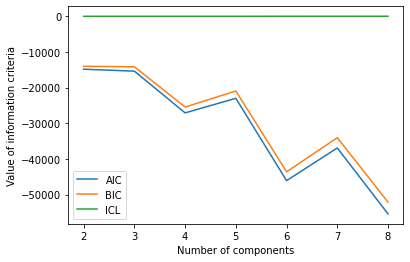

In [64]:

AIC = [model.aic(MD_x) for model in models]
BIC = [model.bic(MD_x) for model in models]
ICL = [model.lower_bound_ for model in models]
plt.plot(k_values, AIC, label="AIC")
plt.plot(k_values, BIC, label="BIC")
plt.plot(k_values, ICL, label="ICL")
plt.ylabel("Value of information criteria")
plt.xlabel("Number of components")
plt.legend()
plt.show()

In [65]:
desired_k = 4
desired_model = models[desired_k - 2]

# Obtain the cluster assignments from the desired model
MD_m4_clusters = desired_model.predict(MD_x)

# Compare cluster assignments from K-means and Gaussian mixture model
kmeans = KMeans(n_clusters=desired_k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

Mixture   0    1    2    3
K-means                   
0         0  472   53    1
1         1  230    0  142
2        96    0    5  138
3        10   19  247   39


In [66]:
MD_m4a = GaussianMixture(n_components=desired_k)
MD_m4a.fit(MD_x, MD_m4_clusters)

# Compare cluster assignments from K-means and the fitted Gaussian mixture model
MD_m4a_clusters = MD_m4a.predict(MD_x)
table = pd.crosstab(kmeans_clusters, MD_m4a_clusters, rownames=["K-means"], colnames=["Mixture"])
print(table)

Mixture    0    1    2   3
K-means                   
0        327    0  178  21
1         51  124  189   9
2          3  120  107   9
3        119    0  178  18


In [67]:
loglik_m4a = MD_m4a.score(MD_x)
loglik_m4 = desired_model.score(MD_x)
print(f"Log-Likelihood (Mixture Model with Fixed Clusters): {loglik_m4a}")
print(f"Log-Likelihood (Fitted Mixture Model): {loglik_m4}")

Log-Likelihood (Mixture Model with Fixed Clusters): 12.045609066451185
Log-Likelihood (Fitted Mixture Model): 9.535516836283348


In [68]:
like_table = mcdonalds['Like'].value_counts().sort_index(ascending=False)
like_table_rev = like_table.iloc[::-1]
print(like_table_rev)

+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64


In [69]:
# Replace the problematic value with NaN
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a new variable 'Like.n' by subtracting 'Like' from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Drop rows with NaN values in 'Like.n'
mcdonalds = mcdonalds.dropna(subset=['Like.n'])

# Create a frequency table of 'Like.n'
like_n_table = mcdonalds['Like.n'].value_counts().sort_index()
print(like_n_table)

2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64


In [70]:
# Construct the formula for the regression model
formula = 'Like.n ~ ' + ' + '.join(mcdonalds.columns[0:11])
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
